<h2>Methods definition</h2>

In [226]:
def Simpson_1_3(f,xlims,nx,ylims,ny):
    """
    This function calculates a double integral using the 
    Simpson's 1/3 rule (the first integral is with respect to the y variable).
    
    Parameters:
    -----------
    f (function):
        The function to be integrated.
    xlims (list or tuple of floats or ints):
        The limits for the x variable integral.
    ylims (list or tuple of floats, ints or functions):
        The limits for the y variable integral.
    nx (int):
        The number of divisions for the interval xlims.
    ny (int):
        The number of divisions for the interval ylims.
    
    Returns:
    --------
    (float): 
        Returns the value of the integration of the function f.
    """

    # Necessary library
    import numpy as np

    # Check if the limits of y variable are functions
    if type(ylims[0]) in [int, float]: low = lambda x: ylims[0]
    else: low = ylims[0]
    if type(ylims[1]) in [int, float]: up = lambda x: ylims[1]
    else: up = ylims[1]

    # Step of x variable
    hx = (xlims[1] - xlims[0])/nx

    I = 0 # Initial value of the double integral
    for i in range(0,nx-1,2): # Loop for the nx intervals
        xs = xlims[0] + np.array([i,i+1,i+2])*hx # Calculating xi, xi+1, xi+2
        hy = (up(xs) - low(xs))/ny # Steps of y variable for each x = xi, xi+1, xi+2
        
        F = 0 # Initial value of the integral as for y variable
        for j in range(0,ny-1,2): # Loop for the ny intervals
            # Calculating yj, yj+1, yj+2 for each hy = hy(xi), hy(xi+1), hy(xi+2)
            ys = low(xs) + np.outer(hy, [j,j+1,j+2])

            # Integration as for the y variable
            F += (f(xs, ys[:,0]) + 4*f(xs, ys[:,1]) + f(xs, ys[:,2]))*hy/3

        # Integration as for the x variable
        I += sum(F*[1,4,1])
    return I*hx/3

In [211]:
def MD_Integration(f, minmax_x, minmax_y, max_f, y_func_limits=[None, None], N = 10**5):
    '''
    This function calculates a double integral using the 
    Monte Carlo method (the first integral is with respect to the y variable).
    
    Parameters:
    -----------
    f (function):
        The function to be integrated.
    minmax_x (list or tuple of floats or ints):
        The limits of the x-axis that encompass the integration volume.
    minmax_y (list or tuple of floats or ints):
        The limits of the y-axis that encompass the integration volume.
    max_f (float):
        The local maximum value of f(x,y) in the integration area.
    y_func_limits (list of functions):
        The functions of x that define the limits of the integral for the y variable.
    N (int):
        The number of random points.
    
    Returns:
    --------
    (float): 
        Returns the value of the integration of the function f.
    '''

    # Necessary library
    import numpy as np

    # Check if the limits of y variable are functions
    if y_func_limits[0] == None: y_func_limits[0] = lambda x: minmax_y[0]
    if y_func_limits[1] == None: y_func_limits[1] = lambda x: minmax_y[1]

    # lower and upper integrals' limits
    lower = np.array([minmax_x[0],minmax_y[0]])
    upper = np.array([minmax_x[1],minmax_y[1]])

    successes = 0 # Initial value of the successes
    for i in range(N): # N random points
        rns = np.random.uniform(lower, upper, 2) # random numbers for x and y variables
        f_rn = np.random.uniform(0, max_f, 1) # random number for the function f
        
        # check if the random point (x,y,f) is in the integration volume
        if  y_func_limits[0](rns[0]) <= rns[1] and \
            y_func_limits[1](rns[0]) >= rns[1] and \
            f_rn <= f(*rns): successes += 1
            
    return successes*(minmax_x[1]-minmax_x[0])*(minmax_y[1]-minmax_y[0])*max_f/N

<h2>Initial conditions</h2>

In [266]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.precision', 6)
sns.set_theme()

In [267]:
# function and limits of y variable
f = lambda x,y: x**2 + y**3
upper = lambda x: 2*x
lower = lambda x: x

<h2>Simpson's 1/3 rule</h2>

In [227]:
# x for n values and y for integration values
x = np.power(2, range(1,10+1))
y = np.array([])

# data
for n in x:
    Inew = Simpson_1_3(f,(0,1),n,(lower,upper),n)
    y = np.append(y,Inew)

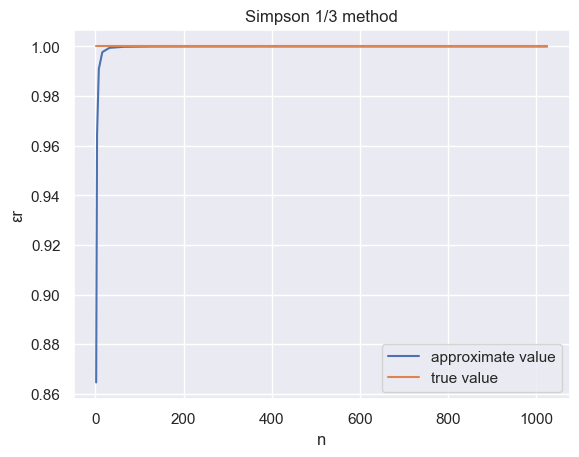

In [228]:
# Line plots of the approximate value and true value
sns.lineplot(x=x,y=y, label='approximate value')
sns.lineplot(x=x,y=1, label='true value')

# labels and title
plt.xlabel('n')
plt.ylabel('εr')
plt.title('Simpson 1/3 method')
plt.legend()
plt.show()

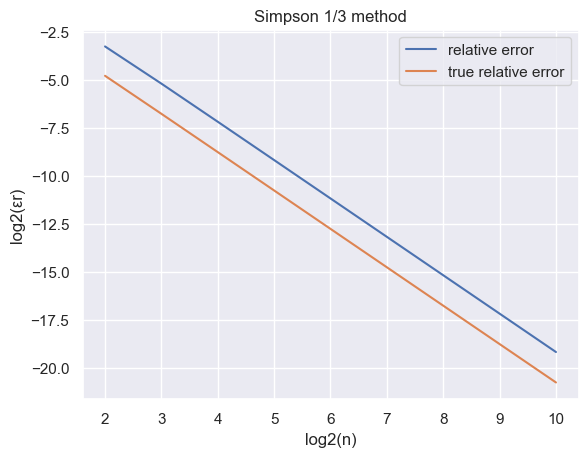

In [229]:
# Line plots of the relative error and true relative error
sns.lineplot(x=np.log2(x[1:]),y=np.log2((y[1:]-y[:-1])/y[1:]), label='relative error')
sns.lineplot(x=np.log2(x[1:]),y=np.log2(1-y[1:]), label='true relative error')

# labels and title
plt.xlabel('log2(n)')
plt.ylabel('log2(εr)')
plt.title('Simpson 1/3 method')
plt.legend()
plt.show()

<h2>Monte Carlo</h2>

In [303]:
# The number of simulations and the number of The number of random points
NMC = 100
x = np.int64(np.power(10, np.linspace(2,5,10)))

# results for each x
y = np.zeros((len(x),NMC))

# simulations
for i,n in enumerate(x):
    if i != len(x): print(i,end=' ')
    else: print(i)
    
    for j in range(NMC):
        y[i,j] = MD_Integration(f,[0,1],[0,2],9,[lower, upper], n)

# data
stds = np.std(y,axis=1)
means = np.mean(y,axis=1)

0 1 2 3 4 5 6 7 8 9 

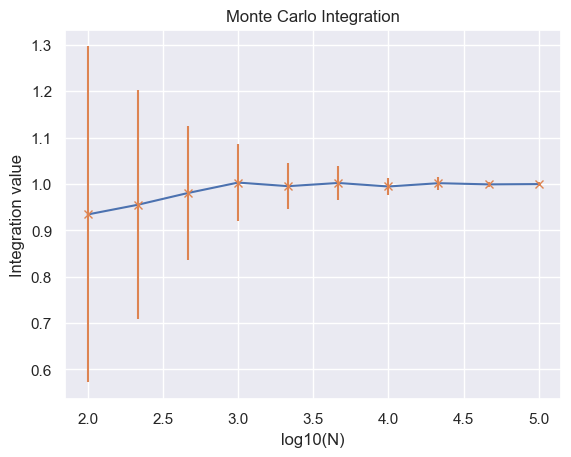

In [308]:
# Line plots of the integration value and number of The number of random points
sns.lineplot(x=np.log10(x), y=mean)
plt.errorbar(np.log10(x), mean, yerr=std, fmt='x') # error bars

# labels and title
plt.xlabel('log10(N)')
plt.ylabel('Integration value')
plt.title('Monte Carlo Integration')
plt.show()